In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
raw_data=pd.read_csv("EOR_DATASET.csv")

In [3]:
data=raw_data.copy()

In [4]:
data.shape

(203, 11)

In [5]:
data.head()

,Country,EOR_Method,Porosity,Permiability,Depth,Gravity,Viscocity,Temperature,Oil_Saturation,Project_Eval,Profit
0,USA,Polymer,14.0,40.0,4800.0,34.0,2.63,102.0,50.0,succ,No
1,Norway,Steam Injection,31.0,205.0,1200.0,19.0,32.00,105.0,57.0,Disc.,No
2,USA,CO2 Injection,23.0,30.0,2680.0,40.0,1.00,82.0,60.0,Disc.,No
3,USA,CO2 Injection,16.0,20.0,4500.0,41.0,1.10,97.0,35.0,Disc.,good
4,USA,CO2 Injection,18.0,2.0,5400.0,42.0,0.40,104.0,39.0,Disc.,good


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         203 non-null    object 
 1   EOR_Method      203 non-null    object 
 2   Porosity        203 non-null    float64
 3   Permiability    203 non-null    float64
 4   Depth           203 non-null    float64
 5   Gravity         203 non-null    float64
 6   Viscocity       203 non-null    float64
 7   Temperature     203 non-null    float64
 8   Oil_Saturation  203 non-null    float64
 9   Project_Eval    203 non-null    object 
 10  Profit          203 non-null    object 
dtypes: float64(7), object(4)
memory usage: 17.6+ KB


In [7]:
data.isnull().sum()

Country           0
EOR_Method        0
Porosity          0
Permiability      0
Depth             0
Gravity           0
Viscocity         0
Temperature       0
Oil_Saturation    0
Project_Eval      0
Profit            0
dtype: int64

In [8]:
data['EOR_Method'].value_counts()

Steam Injection    79
CO2 Injection      72
HC injection       30
Combustion         13
Polymer             9
Name: EOR_Method, dtype: int64

In [9]:
data.describe()

,Porosity,Permiability,Depth,Gravity,Viscocity,Temperature,Oil_Saturation
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,23.176502,1398.012315,4226.613793,26.879803,8837.250296,129.815764,60.040394
std,22.877027,2385.858371,2831.695135,11.300216,46386.283444,76.529299,16.831308
min,0.280000,1.000000,175.000000,8.000000,0.140000,54.000000,0.800000
25%,12.000000,10.000000,1500.000000,14.000000,1.000000,99.000000,50.000000
50%,20.000000,160.000000,4500.000000,30.000000,2.300000,106.000000,60.000000
75%,30.000000,2000.000000,6000.000000,36.000000,1612.500000,154.000000,70.000000
max,303.000000,10000.000000,10000.000000,48.000000,500000.000000,1000.000000,94.000000


<Figure size 2880x2880 with 0 Axes>

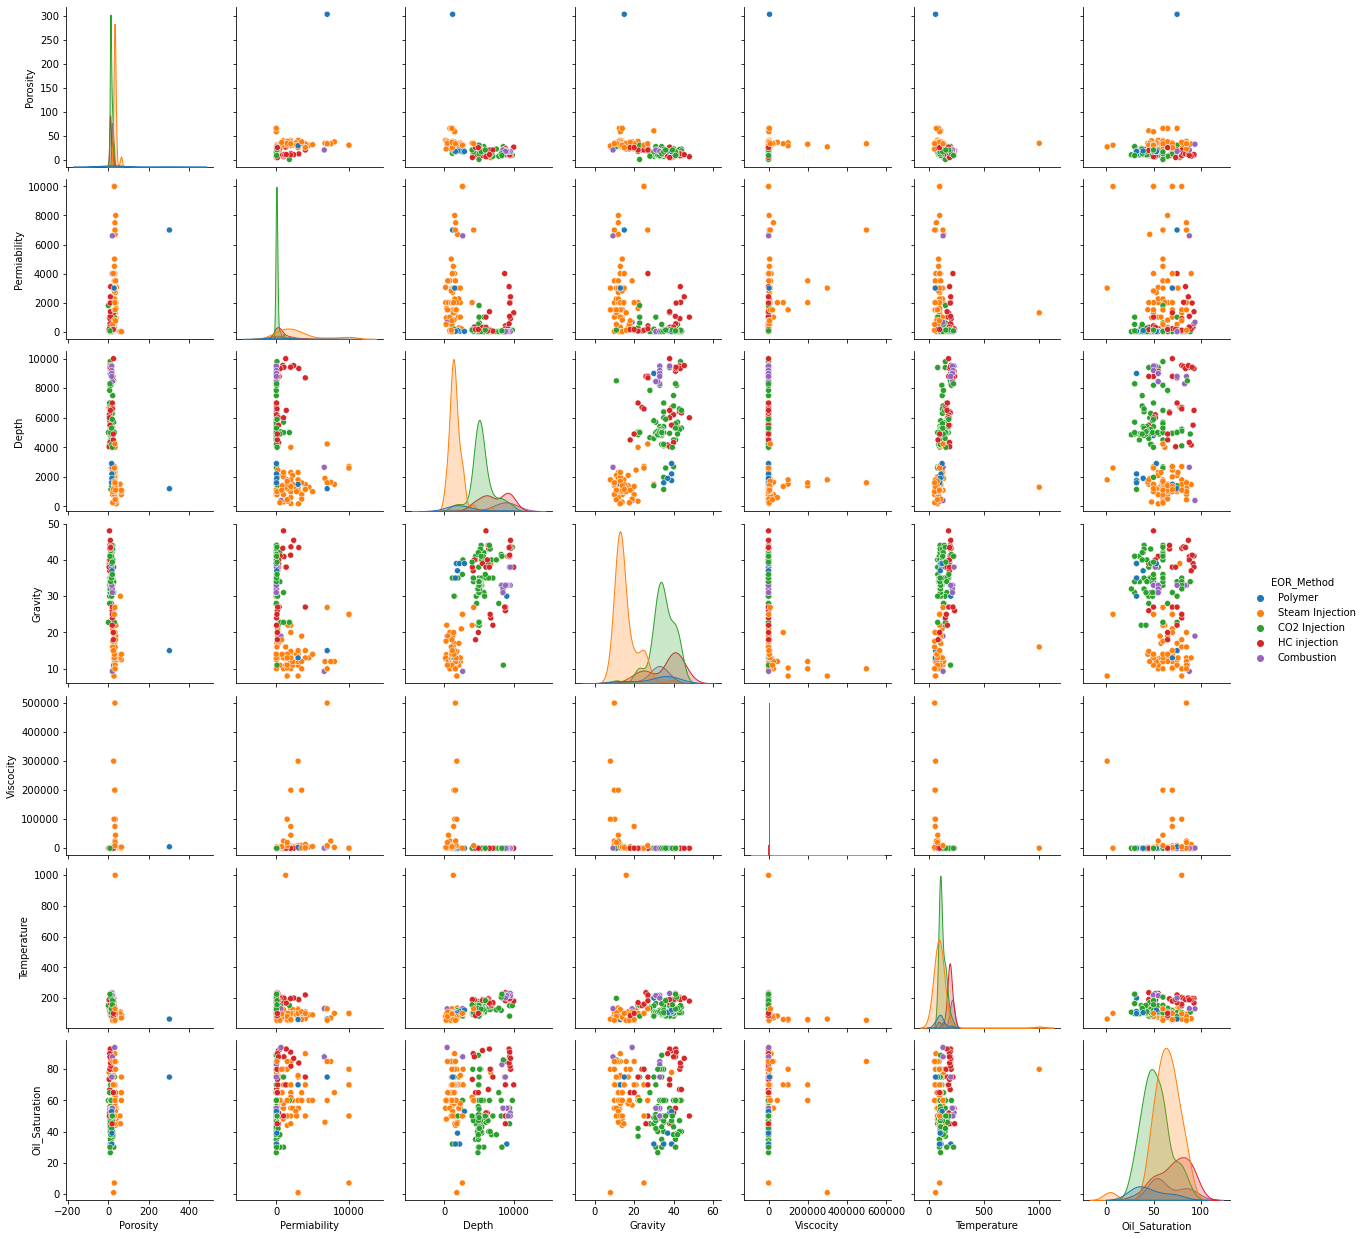

In [10]:
plt.figure(figsize=(40,40))
sns.pairplot(data,hue='EOR_Method')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gravity', ylabel='Density'>

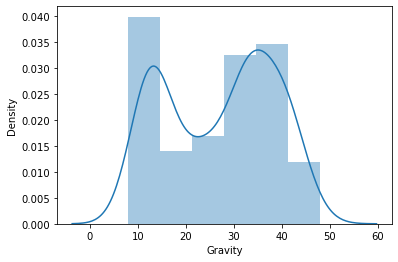

In [11]:
sns.distplot(data['Gravity'])

<AxesSubplot:xlabel='count', ylabel='Country'>

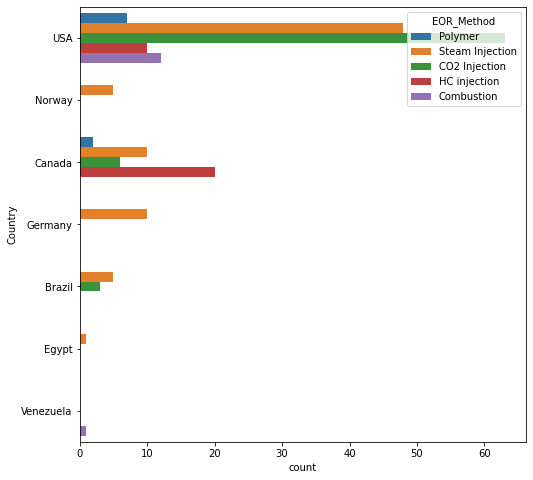

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(y='Country',data=data,hue='EOR_Method')

<AxesSubplot:xlabel='count', ylabel='EOR_Method'>

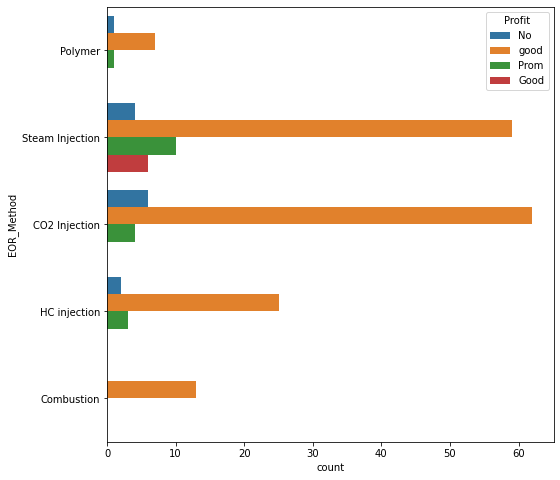

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(y='EOR_Method',data=data,hue='Profit')

In [14]:
data.columns

Index(['Country', 'EOR_Method', 'Porosity ', 'Permiability', 'Depth',
       'Gravity', 'Viscocity', 'Temperature', 'Oil_Saturation',
       'Project_Eval ', 'Profit'],
      dtype='object')

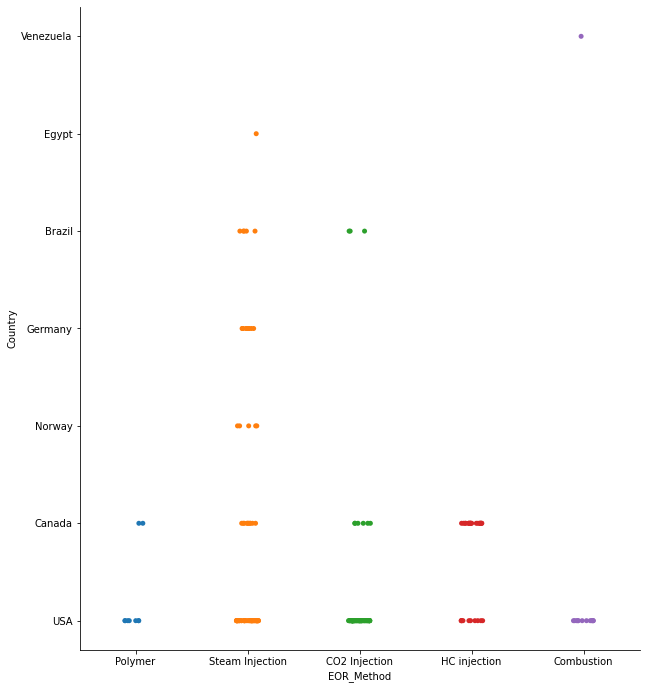

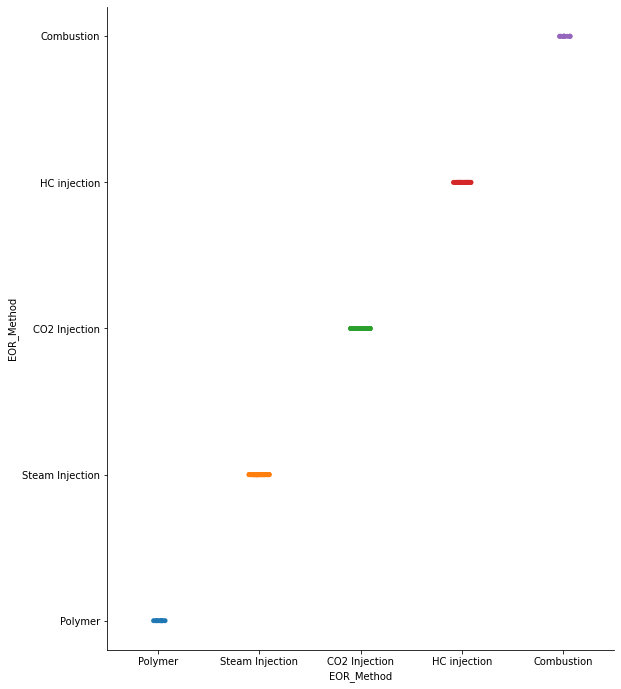

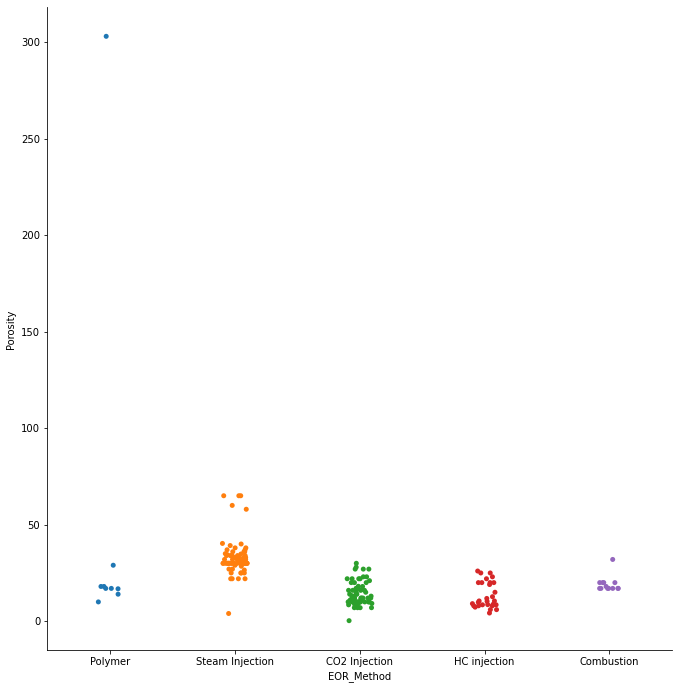

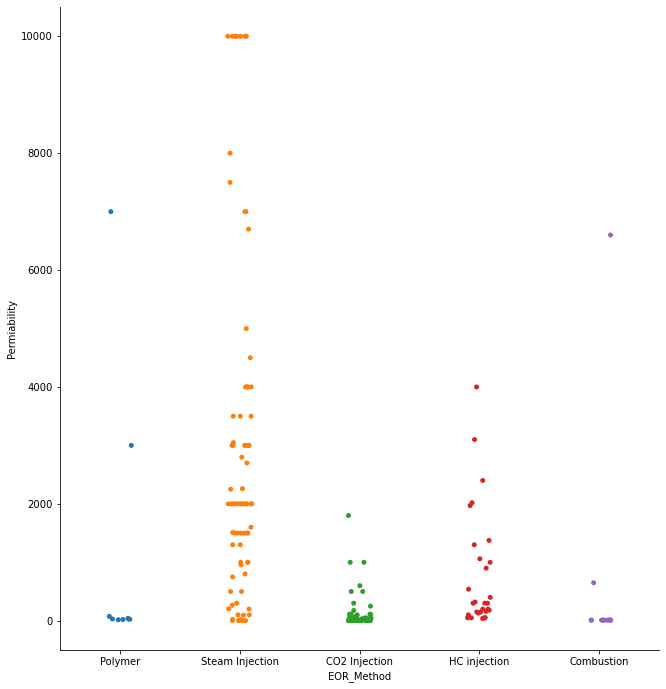

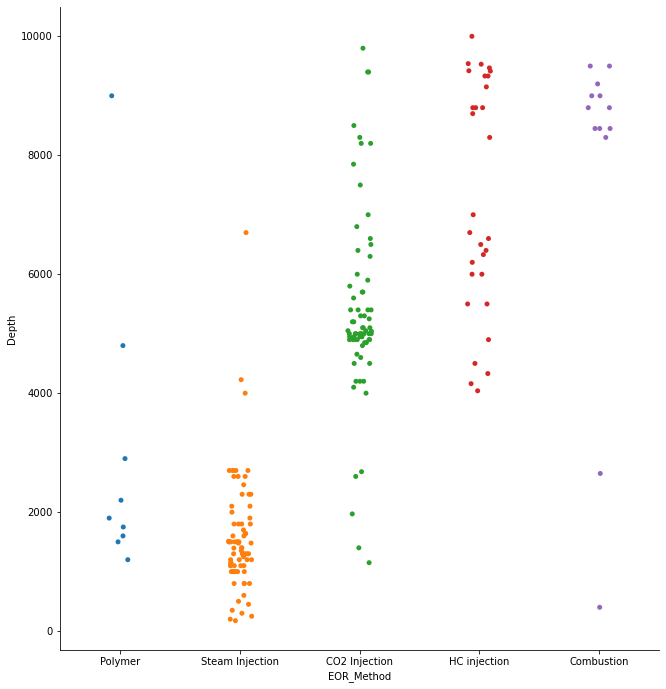

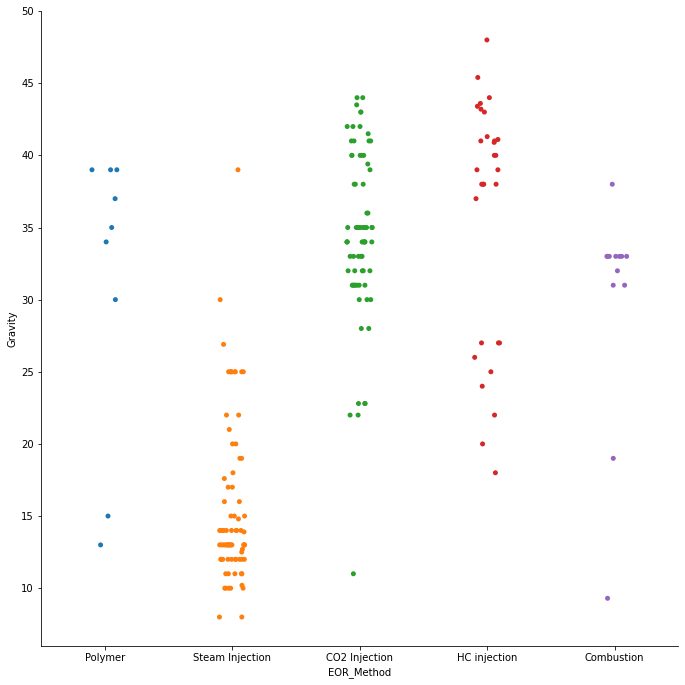

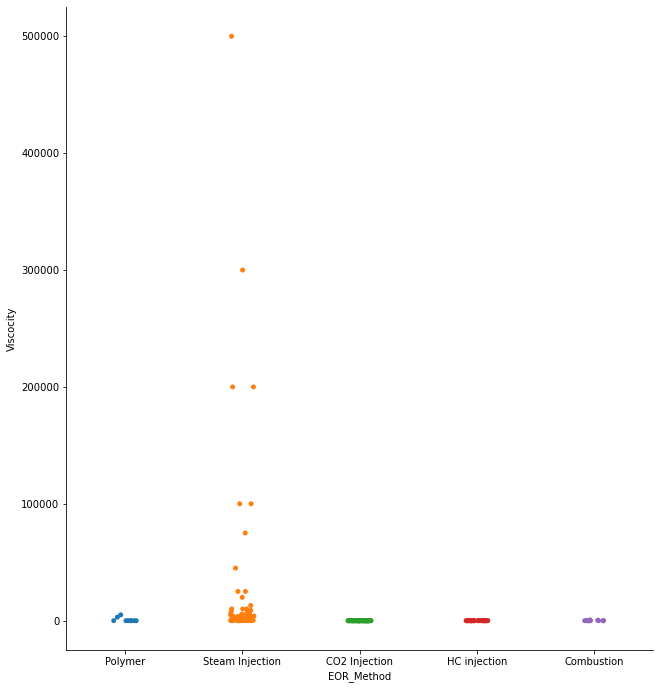

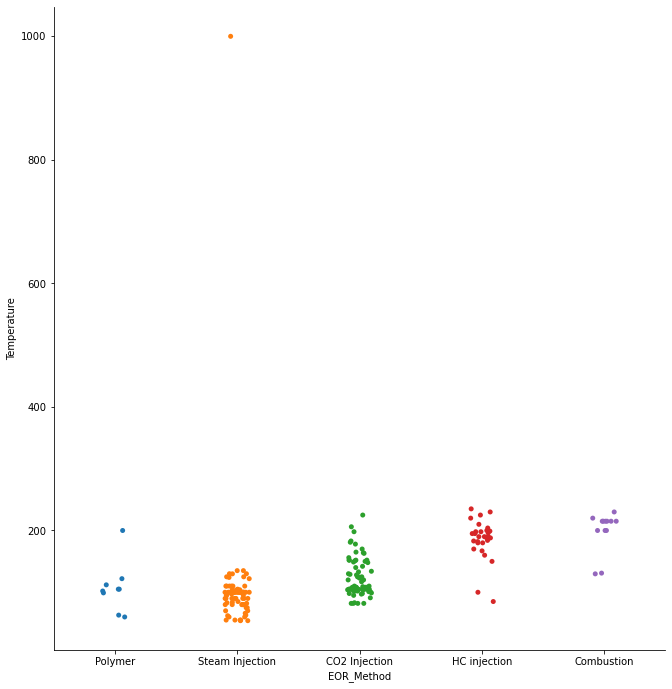

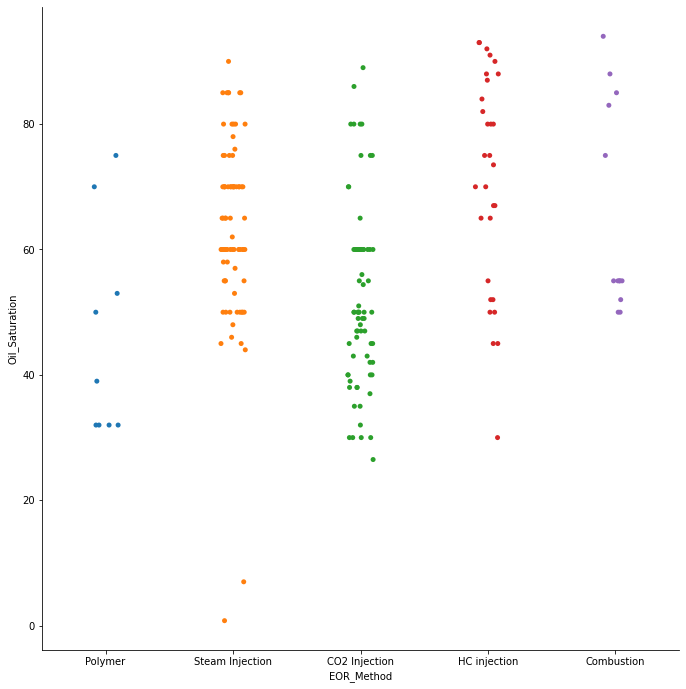

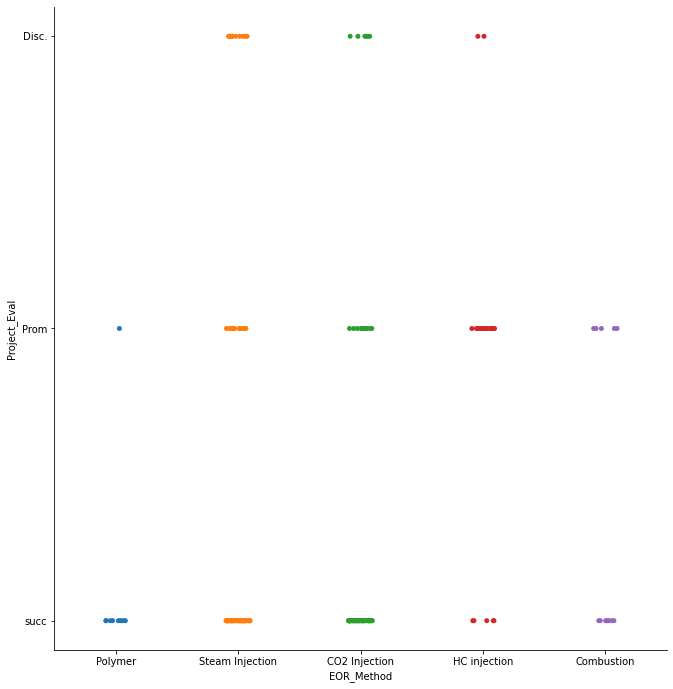

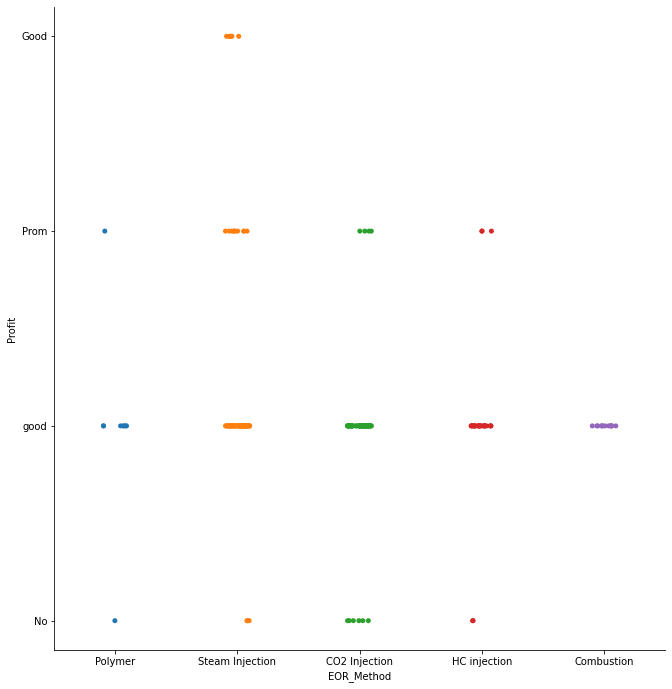

In [15]:
for i in data.columns:
    ax=sns.catplot(x="EOR_Method",y=i,data=data)
    ax.fig.set_size_inches(10,10)
    

In [16]:
data.columns

Index(['Country', 'EOR_Method', 'Porosity ', 'Permiability', 'Depth',
       'Gravity', 'Viscocity', 'Temperature', 'Oil_Saturation',
       'Project_Eval ', 'Profit'],
      dtype='object')

In [17]:
data['Country']=LabelEncoder().fit_transform(data['Country'])
data['Project_Eval ']=LabelEncoder().fit_transform(data['Project_Eval '])
data['Profit']=LabelEncoder().fit_transform(data['Profit'])

In [18]:
x=data.drop(['EOR_Method'],axis=1)
y=data['EOR_Method']

In [19]:
x.head()

,Country,Porosity,Permiability,Depth,Gravity,Viscocity,Temperature,Oil_Saturation,Project_Eval,Profit
0,5,14.0,40.0,4800.0,34.0,2.63,102.0,50.0,2,1
1,4,31.0,205.0,1200.0,19.0,32.00,105.0,57.0,0,1
2,5,23.0,30.0,2680.0,40.0,1.00,82.0,60.0,0,1
3,5,16.0,20.0,4500.0,41.0,1.10,97.0,35.0,0,3
4,5,18.0,2.0,5400.0,42.0,0.40,104.0,39.0,0,3


In [20]:
y.head(50)

0             Polymer
1     Steam Injection
2       CO2 Injection
3       CO2 Injection
4       CO2 Injection
5       CO2 Injection
6       CO2 Injection
7        HC injection
8        HC injection
9     Steam Injection
10    Steam Injection
11    Steam Injection
12    Steam Injection
13    Steam Injection
14    Steam Injection
15    Steam Injection
16    Steam Injection
17    Steam Injection
18    Steam Injection
19    Steam Injection
20    Steam Injection
21      CO2 Injection
22      CO2 Injection
23      CO2 Injection
24      CO2 Injection
25      CO2 Injection
26      CO2 Injection
27      CO2 Injection
28      CO2 Injection
29      CO2 Injection
30      CO2 Injection
31      CO2 Injection
32       HC injection
33         Combustion
34         Combustion
35            Polymer
36    Steam Injection
37    Steam Injection
38    Steam Injection
39    Steam Injection
40    Steam Injection
41    Steam Injection
42    Steam Injection
43    Steam Injection
44    Steam Injection
45    Stea

In [21]:
target=LabelEncoder().fit_transform(y)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         203 non-null    int32  
 1   EOR_Method      203 non-null    object 
 2   Porosity        203 non-null    float64
 3   Permiability    203 non-null    float64
 4   Depth           203 non-null    float64
 5   Gravity         203 non-null    float64
 6   Viscocity       203 non-null    float64
 7   Temperature     203 non-null    float64
 8   Oil_Saturation  203 non-null    float64
 9   Project_Eval    203 non-null    int32  
 10  Profit          203 non-null    int32  
dtypes: float64(7), int32(3), object(1)
memory usage: 15.2+ KB


In [23]:
target

array([3, 4, 0, 0, 0, 0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       2, 2, 4, 4, 0])

<br>3-Polymer</br> 
<br>4-Steam Injection</br>
<br>0-CO2 Injection</br> 
<br>2- HC injection</br> 
<br>1-Combustion</br> 

<AxesSubplot:>

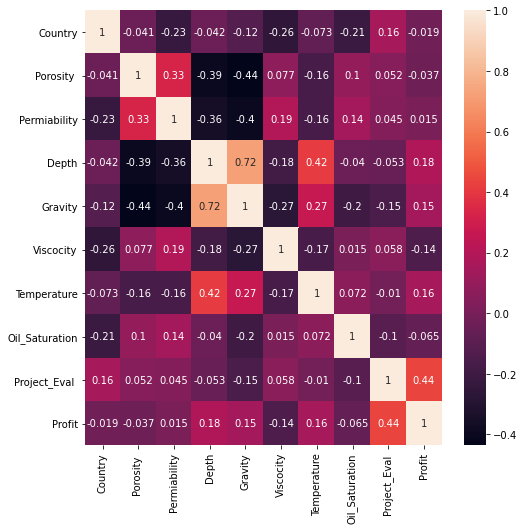

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(x.corr(),annot=True)

Accuracy is:  0.9016393442622951


<AxesSubplot:>

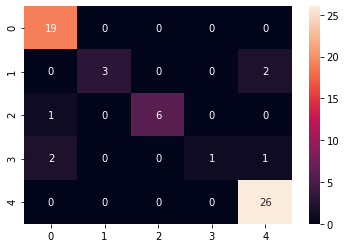

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [26]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications

clf_rf_1 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_1, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)


In [27]:
fs_rfecv = pd.DataFrame(rfecv.support_, columns = ["RFECV"], index=x_train.columns)
fs_rfecv = fs_rfecv.reset_index()
#  make a list of the selected features
# printing some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(x_train.columns[rfecv.support_])))
print('Optimal number of features :', rfecv.n_features_)
print('Best features by rfecv:',x_train.columns[rfecv.support_])

total features: 10
selected features: 7
Optimal number of features : 7
Best features by rfecv: Index(['Porosity ', 'Permiability', 'Depth', 'Gravity', 'Viscocity',
       'Temperature', 'Oil_Saturation'],
      dtype='object')


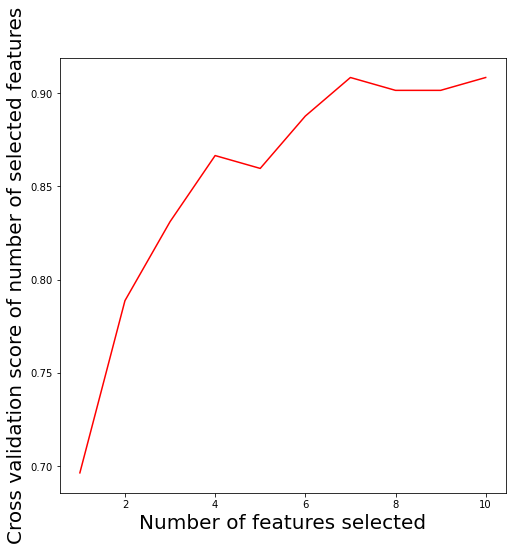

In [28]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.xlabel("Number of features selected",fontsize=20)
plt.ylabel("Cross validation score of number of selected features",fontsize=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_,c='r')
plt.show()

Feature ranking:
1. feature 5 (0.224504)
2. feature 3 (0.217447)
3. feature 6 (0.126715)
4. feature 4 (0.116824)
5. feature 1 (0.104128)
6. feature 2 (0.082735)
7. feature 7 (0.044527)
8. feature 0 (0.031309)
9. feature 8 (0.026041)
10. feature 9 (0.025770)


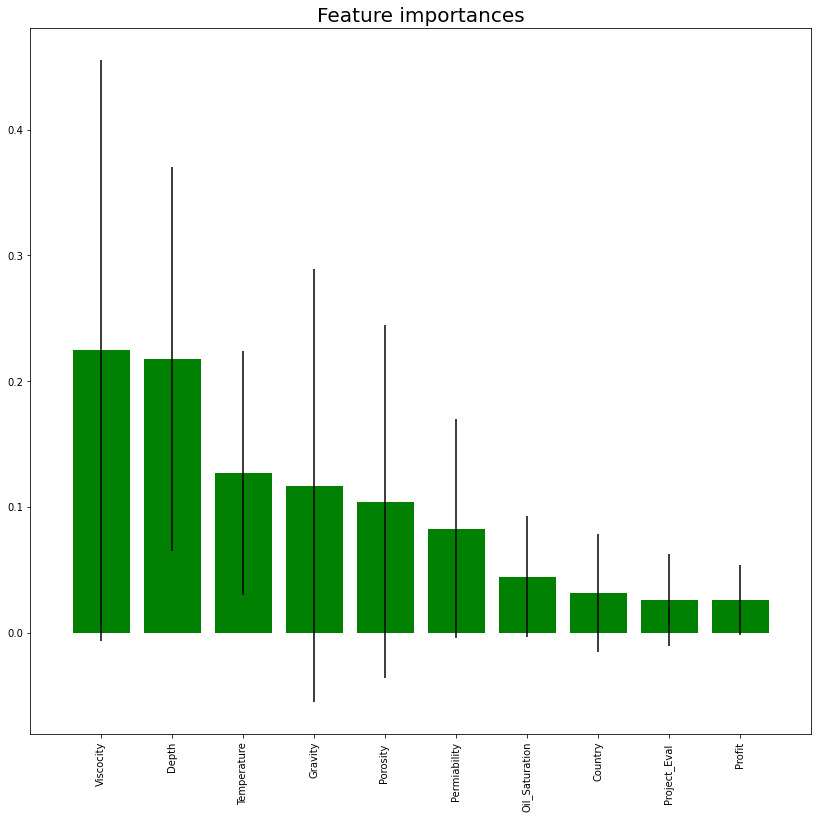

In [29]:
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train,y_train)
importances = clr_rf_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances",fontsize=20)
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()